# Introduction to Machine Learning

"Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves."

Machine learning is the broad way in which data science manifests itself in the world to solve problems. Machine learning is where the collision between algorithms and programming happens with statistical inference, generating the insights that are complex to human beings to extract.

Machine learning is often seen as the silver bullet but this is very far from the reality. Whilst these methods can be incredibly powerful, one needs to understand general concepts such as bias and variance, overfitting and underfitting to make it useful and not detract from the possible reality. Domain knowledge with data science is the combination that yields the practical results. 

### For a more practical purpose...
Machine Learning is the process of learning historical behaviours and mimicing them. Taking an example,
1. Based on the price of household groceries in the past few months, a computer program will be able to predict the price in the next few months
2. By understanding which type of cars have exhibited similar performance in the past, they can be placed in various groups into which future cars be sorted when their performance is observed.

In the first example, we are trying to learn an established behavior, price. We are trying to understand how price behaves when other observable traits, such as buyer characteristics, vary. We then use this information to predict what will happen in the future.

In the second example, we determine a relationship between various parameters that define the performance of a car. We use this relationship to say which car is more similar to others. This is used to form identifiable groups within cars.

While in both scenarios the program is learning historical behaviour from past data, there is a fundamental difference. In the first case, we have historical values of price that can be used to __supervise__ the program output and measure how good or bad the prediction is. In the second example, the groups are being formed by the program, and no historical knowledge exists to measure the program's performance. The group formation is __unsupervised__. Hence, the first example falls in a sub-category of Machine Learning called Supervised Learning, and the second falls in Unsupervised Learning.

For now, let's focus on Supervised Learning.

## Supervised Learning

In [2]:
%matplotlib inline

In [3]:
# Importing datasets
import statsmodels.datasets as dt
from sklearn import datasets
import sklearn
import os

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For random number generation
import numpy as np

# Package to run Regression
import statsmodels.api as sm

# Cross Validation and Hyperparameter Tuning
from statsmodels.sandbox.tools import cross_val
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

#Data structuring
import pandas as pd

sns.set()
sns.set_context('talk')
path = os.getcwd()

C:\Continuum\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We are using the Boston Massechussets Census Data, which has the following columns:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per USD 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in USD 1000's

Let us try to predict the value of MEDV. Since we will be describing MEDV as a function of the other variables available to us, the value of MEDV will be __dependent__ on the other variables, which should ideally be varying __independently__. Hence, MEDV is called the dependent variable, and every variable used to form the prediction is called an independent variable.

In [4]:
# Getting Boston Dataset
input_raw = dt.get_rdataset( "Boston" , "MASS" ).data

In [6]:
# Number of rows and columns
input_raw.''

(506, 14)

In [7]:
# Snapshot of the data
input_raw.''

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# Column-level information
input_raw.''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [9]:
# Summary Stats
input_raw.''

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


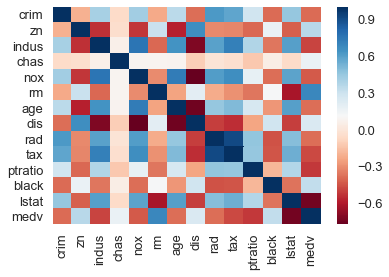

In [10]:
# Correlation Matrix
corr = input_raw.''()
sns.heatmap(corr, cmap='RdBu')

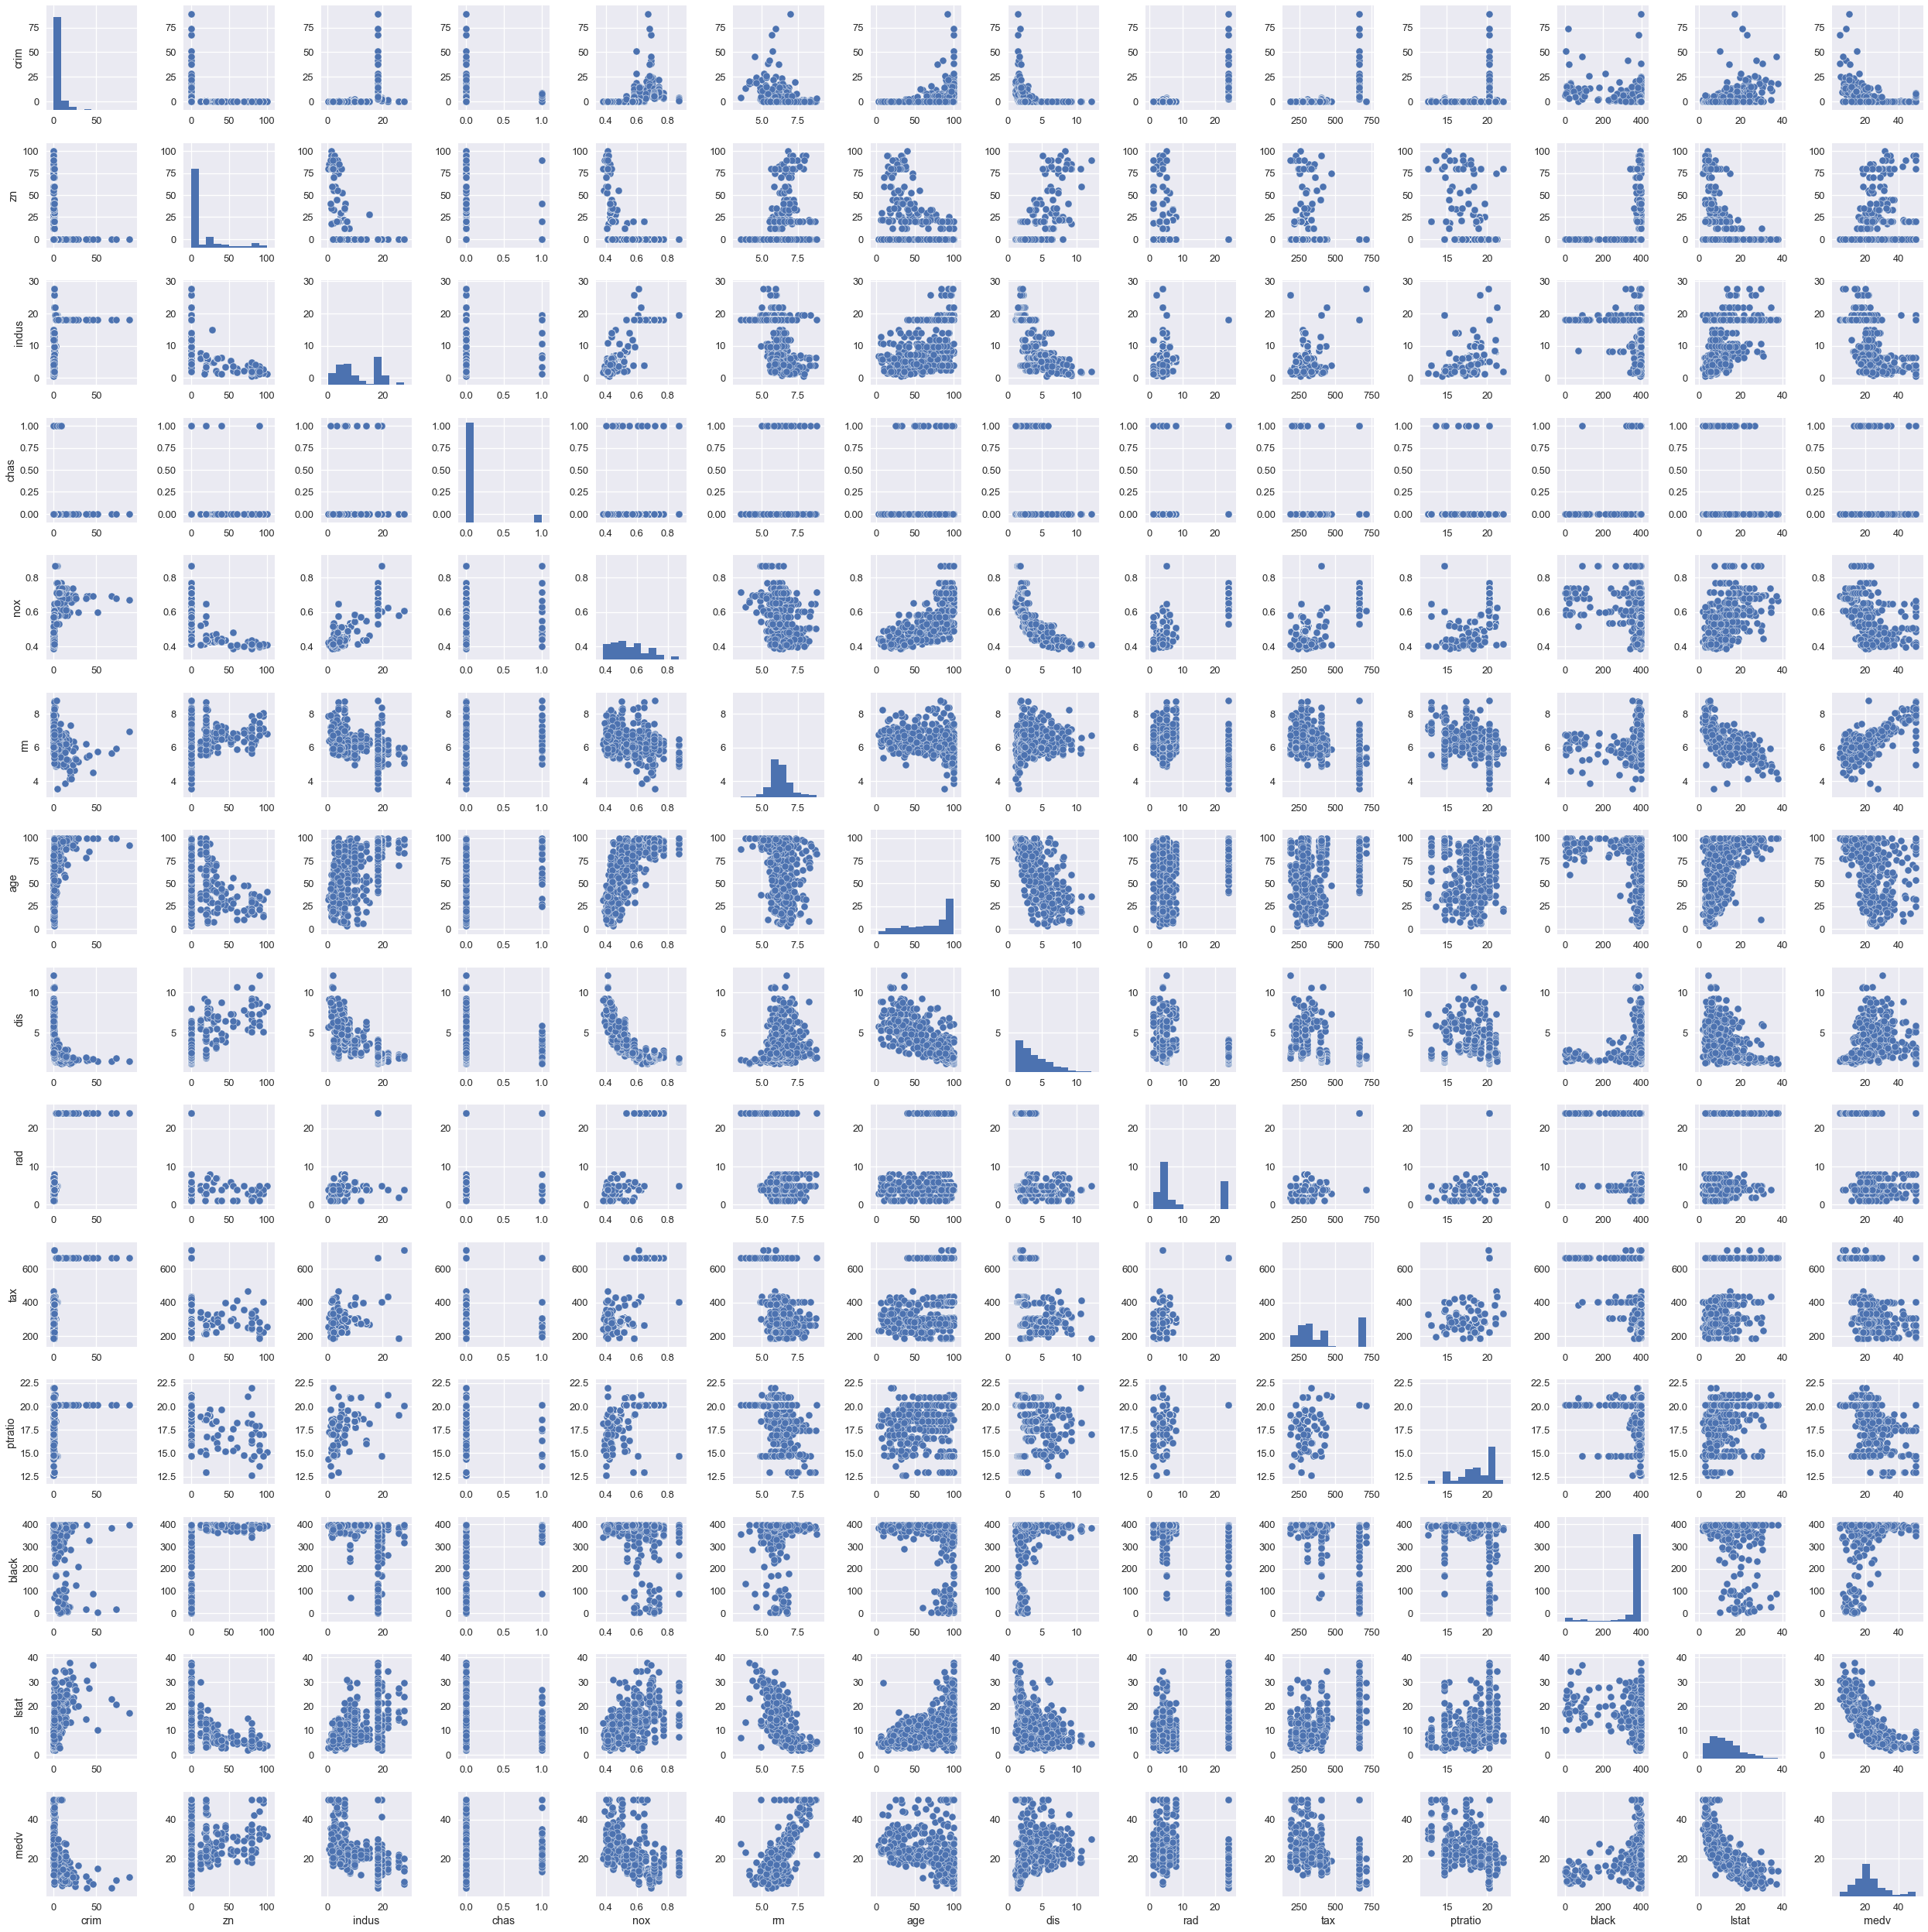

In [12]:
# Multivariate plots
sns.''(input_raw)

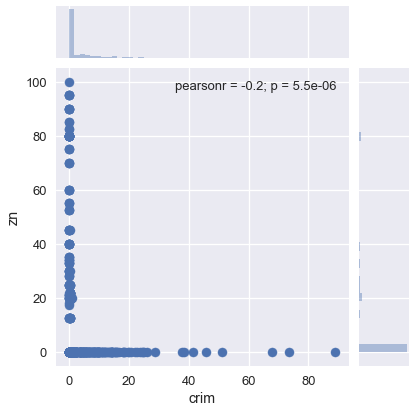

In [14]:
# Deep diving into one bivariate1
sns.''(input_raw['medv'], input_raw['zn'])

#### Loss Function
A supervised learning output is of the form 
$\begin{align*}
f(x_i),
\end{align*}$
, where
$\begin{align*}
x_i,
\end{align*}$
is a list of all variables, which we are using to describe the dependent variable. This makes the output a function of the input. This needs to be evaluated against the actual value of y, as obtained from historical data. To do this, we define a __*loss*__, that when minimized ensures historical y = 
$\begin{align*}
\hat{y},
\end{align*}$
where,
$\begin{align*}
\hat{y}
\end{align*}$
 is the realized value of 
$\begin{align*}
f(x_i),
\end{align*}$

Usually used loss functions are:
1. Mean Square Error: 
$\begin{equation*}
loss = \frac{1}{2n}\sum_{i = 1} ^n (\hat{y} - y)^2
\end{equation*}$

2. Mean Absolute Percentage Error: 
$\begin{equation*}
loss = \frac{1}{n}\sum_{i = 1} ^n \frac{|\hat{y} - y|}{y}
\end{equation*}$

The above loss functions are used to train target variables with a continuous distribution. There are two more loss functions, __*binary crossentropy*__ and __*categorical crossentropy*__, which are applied when the target variable is categorical.

In Linear Regression, we try to minimize the MSE, hence Linear Regression is also called __Ordinary Least Squares__ model or __OLS__ model.

We will see this shortly.

#### Training and Testing Datasets
When Linear Regression is executed, it minimizes the loss function on a dataset. To test it's performance, we need to check the accuracy of the model on a different section of the data. To do this, we break up the dataset into two parts, one of which is used to __train__ the data, the other is used to __test__ the data, hence calling them training and testing datasets.

In [15]:
# Selecting random locations for training datasets
input_raw['is_train'] = np.random.uniform(0, 1, len(input_raw)) <= ''
# Filtering data based in train_index locations
train = input_raw.''[input_raw['is_train']==True, :]
# Drop the index
test = input_raw.''[input_raw['is_train']==False, :]

In [19]:
# Let's now run the model
model = sm.OLS(train.loc[:, 'medv'], train.drop('medv', axis=1, inplace=False)).fit()

In [16]:
del input_raw['is_train']
del train['is_train']
del test['is_train']

In [17]:
print(input_raw.'')
print(train.'')
print(test.'')

(506, 14)
(399, 14)
(107, 14)


In [20]:
# View the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     31.28
Date:                Tue, 20 Mar 2018   Prob (F-statistic):           1.83e-52
Time:                        14:41:07   Log-Likelihood:                -1326.6
No. Observations:                 399   AIC:                             2679.
Df Residuals:                     386   BIC:                             2731.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
zn             0.0485      0.023      2.081      0.038       0.003       0.094
indus         -0.0921      0.101     -0.910      0.363      -0.291       0.107
chas          -0.2654      1.406     -0.189      0.850      -3.029       2.499
nox           -4.3952      5.098     -0.862      0.389     -14.418       5.627
rm             1.7252      0.627      2.750      0.006       0.492       2.959
age            0.0063      0.022      0.287      0.774      -0.037       0.049
dis           -0.8684      0.324     -2.684      0.008      -1.505      -0.232
rad            0.5419      0.097      5.589      0.000       0.351       0.733
tax           -0.0025      0.006     -0.424      0.672      -0.014       0.009
ptratio       -0.0452      0.173     -0.261      0.794      -0.386       0.295
black         -0.0026      0.004     -0.625      0.533      -0.011       0.006
lstat          0.1326      0.083      1.589      0.113      -0.031       0.297
medv          -0.2446      0.070     -3.506      0.001      -0.382      -0.107
==============================================================================
Omnibus:                      534.699   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59704.729
Skew:                           6.629   Prob(JB):                         0.00
Kurtosis:                      61.442   Cond. No.                     8.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Saving the predicted values as a separate column in the test dataset
test1 = test.copy()
test1['Predicted'] = model.predict(test1.drop('crim', axis=1, inplace=False))

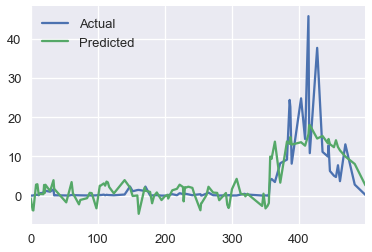

In [24]:
# Plot the predicted and actual trends
test1['medv'].''(label='Actual')
test1['Predicted'].''(label='Predicted')
plt.legend()

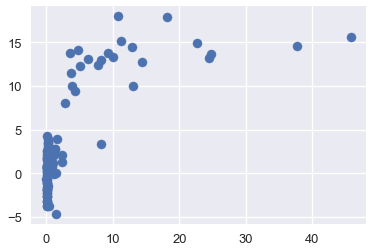

In [26]:
# Scatter of Actual vs Predicted
plt.''(test1['medv'], test1['Predicted'])

$\begin{align*}
MAPE = \frac{1}{n} \sum \frac{| Predicted - Actual |}{Actual}
\end{align*}$

where,

n is the number of observations

In [28]:
# Calculating the MAPE of the model
mape = np.''(np.''(test1['medv']-test1['Predicted'])/test1['medv'])
print(mape)

16.051637465113014


### Crossvalidation

10-fold CrossValidation

|-1-|-2-|-3-|-4-|-5-|-6-|-7-|-8-|-9-|-10-|

|-1-|-2-|-3-|-4-|-5-|-6-|-7-|-8-|-9-|  |-10-|    15%

|-1-|-2-|-3-|-4-|-5-|-6-|-7-|-8-|-10-|  |-9-|    18%

Timeseries CrossValidation

|-1-|-2-|-3-|-4-|-5-|-6-|-------|-7-|-8-|-9-|-10-|

|-1-|-2-|-3-|-4-|-5-|-6-|-7-|-------|-8-|-9-|-10-|

|-1-|-2-|-3-|-4-|-5-|-6-|-7-|-8-|-------|-9-|-10-|

|-1-|-2-|-3-|-4-|-5-|-6-|-7-|-8-|-9-|-------|-10-|

In [29]:
# K-Fold CrossValidation
kf = cross_val.KFold(input_raw.shape[0], k=10)

In [30]:
model = {}
count = 0
mape = {}
for train_index, test_index in kf:
    X_train, X_test, y_train, y_test = cross_val.split('', '', '', '')
    model[count] = sm.OLS('', '').fit()
    mape[count] = np.mean(np.abs(y_test - model[count].predict(X_test))/y_test)
    count+=1

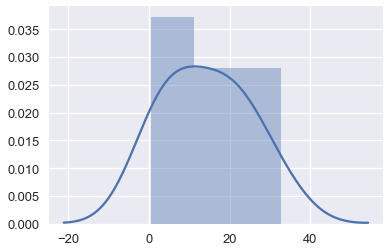

In [31]:
sns.''(list(mape.values()))

In [32]:
mape.values()

dict_values([18.683311896060893, 24.072554580429834, 11.37058275228484, 16.766383864762204, 6.7650834137373081, 23.926721393489075, 32.734360009229377, 0.59264693108201927, 0.53183931051884625, 7.3409988639050292])

In [33]:
print('Bias:')
print(np.''(list(mape.values())))
print()
print('Variance:')
print(np.''(list(mape.values())))

Bias:
14.2784483015

Variance:
10.2202346924


### Regularization
As discussed before, we write

$\begin{align*}
y = f(x_1, x_2, x_3, ...)
\end{align*}$

But, what if, 

$\begin{align*}
x_1 = g(x_2)
\end{align*}$

So our equation has unconsciously become,

$\begin{align*}
y = f(g(x_2 + x_3), x_2, x_3, ...)
\end{align*}$

$\begin{align*}
y = m_1x_1 + m_2x_2 + m_3x_3 + c
\end{align*}$

$\begin{align*}
Cost = f(m_1, m_2, m_3)
\end{align*}$

$\begin{align*}
y = m_2x_2 + m_3x_3 + m_1(ax_2+bx_3)
\end{align*}$

$\begin{align*}
y = (m_2+am_1)x_2 + (m_3+bm_1)x_3
\end{align*}$

In regression, we minimize


$\begin{align*}
loss = \frac{1}{2n}\sum_{i = 1} ^n (\hat{y} - y)^2
\end{align*}$

In Lasso (L1),

$\begin{align*}
loss = \frac{1}{2n}\sum_{i = 1} ^n (\hat{y} - y)^2 + \alpha*(m_1 + m_2 + m_3)
\end{align*}$

In Ridge (L2),

$\begin{align*}
loss = \frac{1}{2n}\sum_{i = 1} ^n (\hat{y} - y)^2 + \alpha*(m_1^2 + m_2^2 + m_3^2)
\end{align*}$

In Elastic Net (L1L2)

$\begin{align*}
loss = \frac{1}{2n}\sum_{i = 1} ^n (\hat{y} - y)^2 + L_1 wt*\alpha*(m_1 + m_2 + m_3) + (1 - L_1 wt)*\alpha*(m_1^2 + m_2^2 + m_3^2)          
\end{align*}$

In [48]:
#regularized_model = sm.OLS(train.loc[:, 'medv'], train.drop('medv', axis=1, inplace=False)).fit_regularized(alpha=0.9)
regularized_model = {}
count = 0
mape = {}
for train_index, test_index in kf:
    X_train, X_test, y_train, y_test = cross_val.''('', '', '', '')
    regularized_model[count] = sm.''(y_train, X_train).fit_regularized(alpha=0.7)
    mape[count] = np.mean(np.abs(y_test - regularized_model[count].predict(X_test))/y_test)
    count+=1

In [49]:
regularized_model[0].params

array([ 0.03812385,  0.        ,  0.        ,  0.        ,  0.05093455,
        0.034296  ,  0.        ,  0.51739109, -0.00206951,  0.        ,
       -0.0079284 ,  0.120884  , -0.10054258])

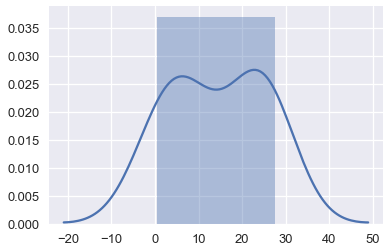

In [50]:
sns.distplot(list(mape.values()))

In [51]:
print('Bias:')
print(np.mean(list(mape.values())))
print()
print('Variance:')
print(np.std(list(mape.values())))

Bias:
14.3040421921

Variance:
10.1321996024


### Hyperparameter Tuning
We applied Lasso Regularization to our model, with regularization parameter=0.9. But could we have achieved a better result by applying a higher or lower valye of parameter? If yes, then which value? Do we check every value? Or is there a smarter way to do it?

Parameters like the regularization parameter,
$\begin{align*}
\alpha
\end{align*}$
that require the users to set a value, and can affect the accuracy of the model are called Hyperparameters. Over time and experience, users can gain intuition around the best value to use for a hyperparameter. But until then, there has to be a systematic way to try out various values of the hyperparameter.

This is another advantage of crossvalidation. Since it is already performing multiple iterations of the model, it can be directed to do so over a series of possibilities. With the output gained, we can select the best values of each parameter to build the model with the highest predictive power.

In [39]:
from sklearn.metrics import make_scorer
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.''(np.''((y_true - y_pred) / y_true)) * 100

In [40]:
tuned_parameters = [{'alpha':[0.1, 0.2, 0.3, 0.5, 0.7, 1.0]}]
model = GridSearchCV(linear_model.''(alpha=1.), tuned_parameters, cv='', scoring=make_scorer(mean_absolute_percentage_error))
model.fit(input_raw.drop('medv', axis=1, inplace=False), input_raw['medv'])

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.5, 0.7, 1.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_absolute_percentage_error), verbose=0)

In [41]:
sorted(model.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_alpha',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'split5_test_score',
 'split5_train_score',
 'split6_test_score',
 'split6_train_score',
 'split7_test_score',
 'split7_train_score',
 'split8_test_score',
 'split8_train_score',
 'split9_test_score',
 'split9_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [47]:
model.cv_results_['mean_test_score']

array([ 1429.74501188,  1409.32868518,  1393.12590417,  1358.84497295,
        1348.85904601,  1353.59894476])

### Intro to scikit learn

Scikit learn, often refered to as sklearn is a powerful python wrapper with several algorithms and parameter adjustment functions that simplifies implementation of machine learning. 

This section focuses in an example of how to use Scikit learn end to end. 

### Creating a model with scikit learn

There are 5 main steps to create and produce outputs with scikit learn modelling:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector 
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
    a. For supervised learning, often we predict labels for unknown data using the predict() method.
    b. For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

Let's step through 2 examples: regression and classification

### Regression

Let's use the boston dataset we used before with OLS.

In [11]:
input_raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
#Choosing a class of model from sklearn
from sklearn.linear_model import LinearRegression

# for more classes consult ?sklearn

In [13]:
#Choosing model hyperparameters
model = LinearRegression(fit_intercept=True)
# to understand what hyperparameters of the model are available you should always consult the documentation (?)

In [15]:
#Arranging the data into a features matrix and a target array - this is always the standard for scikit learn
from sklearn import model_selection

X = input_raw.drop('medv', axis = 1)
y = input_raw['medv']

#Creating training and test sets

X_train, X_test, y_train, y_test = model_selection.''(X, y, test_size = 0.2, 
                                                                             random_state = 33)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(404, 13)
(102, 13)
(404,)
(102,)


In [16]:
#Fitting the model 
model.''(X_train, y_train)

print(model.coef_)
print(model.intercept_)


[ -1.11307273e-01   5.00960846e-02   2.95392471e-02   3.00839630e+00
  -1.53479542e+01   4.04002314e+00  -1.43524468e-03  -1.54300055e+00
   3.23076531e-01  -1.35366479e-02  -8.38134260e-01   8.73220222e-03
  -5.83597765e-01]
33.0460644632


Mean squared error: 22.0425792162


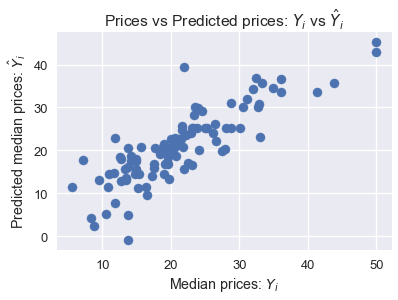

In [17]:
#Predicting unknown labels

y_pred = model.''(X_test)


#Plotting predicted vs. actuals
plt.scatter(y_test, y_pred)
plt.xlabel("Median prices: $Y_i$")
plt.ylabel("Predicted median prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

#Calculating the error
mse = sklearn.metrics.''(y_test, y_pred)
print('Mean squared error:', mse)


### Field Work

For today's session there are 3 simple steps to practice. In your selected data set do the following:

1. Split your data into a training and testing set. Show the dimensions of each. Comment on how did you select the partitioning of your data (e.g. random shuffle, temporal windows) and why did you choose that
2. Apply an ordinary multivariate least square regression with stats models or using sklearn in your data set and show a plot between predicted and actual values. Display the error you got. If you are doing the classification execute the same steps using a simple logistic regression with sklearn and plot a confusion matrix
3. Repeat the procedure but using cross-validation. How did you choose your cross-validation folds and sequence?
